# k平均クラスタリング

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [2]:
class KMeans(object):
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
    
    def fit(self, X):
        iter_max = 100
        centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        for _ in range(iter_max):
            prev_centers = np.copy(centers)
            D = np.zeros((len(X), self.n_clusters))
            for i, x in enumerate(X):
                D[i] = self.distance(x, centers)
            cluster_index = np.argmin(D, axis=1)
            cluster_index = self.one_hot(cluster_index)
            for k in range(self.n_clusters):
                centers[k] = X.T.dot(cluster_index[:, k]) / cluster_index[:, k].sum() 
            if np.allclose(prev_centers, centers):
                break
        self.centers = centers
    
    def one_hot(self, cluster_index):
        I = np.eye(self.n_clusters)
        return I[cluster_index]
    
    def predict(self, X):
        pred = np.empty(len(X), dtype=int)
        for i, x in enumerate(X):
            D = self.distance(x, self.centers)
            pred[i] = np.argmin(D)
        return pred
            
    def distance(self, x1, x2):
        return np.sum((x1 - x2)**2, axis=1)

## サンプルデータ

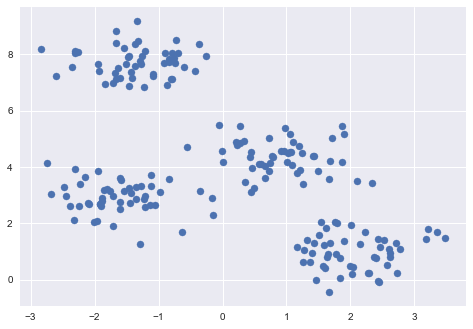

In [3]:
from sklearn.datasets.samples_generator import make_blobs
# データセット生成
X, y = make_blobs(n_samples=200, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring')

### クラスタ数k=4のとき

In [4]:
# k平均クラスタリングクラスを作り、データを学習する
kmeans = KMeans(4)
kmeans.fit(X)

# 各データの属するクラスタを得る
cluster = kmeans.predict(X)

### クラスタ結果とクラスタ平均の図示

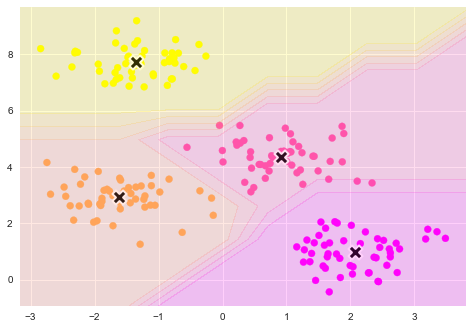

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=cluster, cmap='spring')
# 各クラスタ平均を☓印で
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")

# 境界を図示
x0, x1 = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 10), np.linspace(plt.ylim()[0], plt.ylim()[1], 10))
x = np.array([x0, x1]).reshape(2, -1).T
plt.contourf(x0, x1, kmeans.predict(x).reshape(10, 10), alpha=0.2, cmap='spring')

### クラスタ数k=3のとき

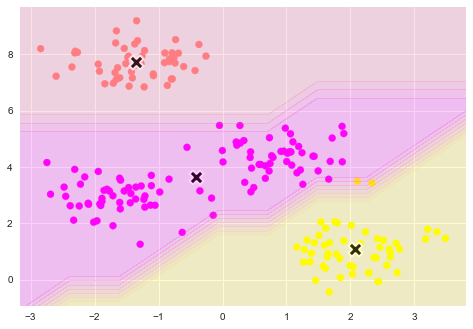

In [6]:
kmeans = KMeans(3)
kmeans.fit(X)

cluster = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, cmap='spring')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")

x0, x1 = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 10), np.linspace(plt.ylim()[0], plt.ylim()[1], 10))
x = np.array([x0, x1]).reshape(2, -1).T
plt.contourf(x0, x1, kmeans.predict(x).reshape(10, 10), alpha=0.2, cmap='spring')